# Human Activity Recognition 

http://activity-net.org/challenges/2016/index.html

Note:
    Video resolution is decease tp 48*64 due to memory issues

In [1]:
# import libraries

import numpy as np
from numpy import newaxis
import pandas as pd
import json

# read mp4 data
import pylab
import imageio
import pysrt

import cv2
import matplotlib.pyplot as plt

import glob
import pickle

** Explore data **

In [2]:
#import data

with open('data/activity_net.v1-2.min.json') as file_:
    activity_net = json.loads(file_.read())
    
with open('data/seltest_annotations.json') as file_:
    seltest_annotations = json.loads(file_.read())
     
with open('data/seltrain_annotations.json') as file_:
    seltrain_annotations = json.loads(file_.read())

In [3]:
for i,video in enumerate(activity_net['database'].keys()):
    print(video)
    print(activity_net['database'][video])
    if i == 10:
        break

WZOa0RpD6xE
{'resolution': '1280x720', 'subset': 'testing', 'duration': 212.3, 'annotations': [], 'url': 'https://www.youtube.com/watch?v=WZOa0RpD6xE'}
JBemXLIpgK8
{'resolution': '426x234', 'subset': 'testing', 'duration': 88.03, 'annotations': [], 'url': 'https://www.youtube.com/watch?v=JBemXLIpgK8'}
94lnTGe5xU4
{'resolution': '640x480', 'subset': 'testing', 'duration': 88.56, 'annotations': [], 'url': 'https://www.youtube.com/watch?v=94lnTGe5xU4'}
NLkJgnrKaKM
{'resolution': '640x480', 'subset': 'training', 'duration': 17.93, 'annotations': [{'label': 'Smoking hookah', 'segment': [0, 17.9258]}], 'url': 'https://www.youtube.com/watch?v=NLkJgnrKaKM'}
JnYteBN2LDI
{'resolution': '640x480', 'subset': 'training', 'duration': 61.09, 'annotations': [{'label': 'Mixing drinks', 'segment': [6.09657, 60.20367]}], 'url': 'https://www.youtube.com/watch?v=JnYteBN2LDI'}
KHsl04qla5A
{'resolution': '1920x1080', 'subset': 'testing', 'duration': 195.47, 'annotations': [], 'url': 'https://www.youtube.com/

In [4]:
for i,video in enumerate(seltrain_annotations.keys()):
    print(video)
    print(seltrain_annotations[video])
    if i == 10:
        break

w8rTULZCkzk
Cleaning shoes
aSPPD0fDI3g
Putting on makeup
-L-LiCO1v-s
Bathing dog
qRFZMO_mTGU
Playing field hockey
dN9ZPc7NMVQ
Washing face
NAl-SP-92dI
Cheerleading
1JEQbXJC85w
Preparing salad
l12QfUhRLLc
Cricket
KOFXi1RYx_g
Playing polo
HdNOiIdGqvE
Washing hands
3am00ii0n-o
Playing flauta


In [5]:
for i,video in enumerate(seltest_annotations.keys()):
    print(video)
    print(seltest_annotations[video])
    if i == 10:
        break

xlPpP0eVL9A
Washing face
yw9W5dZ6T18
Preparing salad
xE9anOqq2XQ
Javelin throw
NulnzF8avMI
Using the pommel horse
gJydcG-d1cs
Playing flauta
ahVeDMNS9ws
Cleaning shoes
DfYDYCWkB-o
Bathing dog
mt3G8TrI-uY
Doing nails
tnk1skdLN0Q
Shot put
vbyMT7bdUX4
Wrapping presents
-c71seS8bWk
Drinking coffee


In [6]:
for i,video in enumerate(seltrain_annotations.keys()):
    if video in activity_net['database'].keys():
        print(activity_net['database'][video])
    if i == 10:
        break

{'resolution': '854x480', 'subset': 'training', 'duration': 185.2, 'annotations': [{'label': 'Cleaning shoes', 'segment': [22.82525, 164.11067]}], 'url': 'https://www.youtube.com/watch?v=w8rTULZCkzk'}
{'resolution': '1920x1080', 'subset': 'training', 'duration': 197.79, 'annotations': [{'label': 'Putting on makeup', 'segment': [12.03138, 180.7519]}], 'url': 'https://www.youtube.com/watch?v=aSPPD0fDI3g'}
{'resolution': '854x480', 'subset': 'training', 'duration': 162.49, 'annotations': [{'label': 'Bathing dog', 'segment': [75.28938, 127.2568]}], 'url': 'https://www.youtube.com/watch?v=-L-LiCO1v-s'}
{'resolution': '1280x720', 'subset': 'training', 'duration': 114.78, 'annotations': [{'label': 'Playing field hockey', 'segment': [38.88152, 43.42159]}, {'label': 'Playing field hockey', 'segment': [27.66447, 48.25616]}, {'label': 'Playing field hockey', 'segment': [66.8782, 74.21958]}], 'url': 'https://www.youtube.com/watch?v=qRFZMO_mTGU'}
{'resolution': '426x240', 'subset': 'training', 'dur

In [7]:
# display random images in video
def show_video_sample_image(filename):
    vid = imageio.get_reader(filename,  'ffmpeg')
    nums = [10, 287]
    for num in nums:
        image = vid.get_data(num)
        fig = pylab.figure()
        fig.suptitle('image #{}'.format(num), fontsize=20)
        pylab.imshow(image)
    pylab.show()

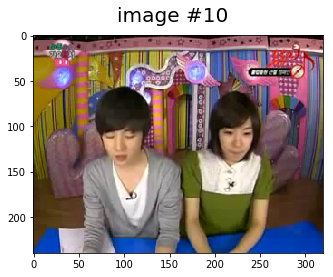

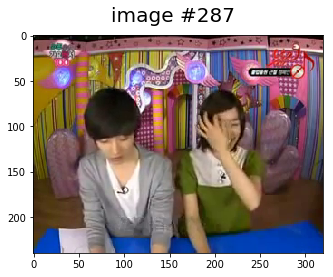

In [8]:
show_video_sample_image('data/sel_train/3am00ii0n-o/3am00ii0n-o.mp4')

In [9]:
# check text data

def show_video_sample_srt(filename):
    
    subs = pysrt.open(filename, encoding='iso-8859-1')
    
    print("Number of sub title instance %s" % len(subs))
    print("Sub-title first line %s" % subs[0].text)
    
    print("Sub-title first line start, minute - %s sec - %s" %(subs[0].start.minutes,subs[0].start.seconds))
    print("Sub-title first line end, minute - %s sec - %s" %(subs[0].end.minutes,subs[0].end.seconds))
    
    

In [10]:
show_video_sample_srt('data/sel_train/6azNzt8rXAs/6azNzt8rXAs.en.srt')

Number of sub title instance 20
Sub-title first line op
Sub-title first line start, minute - 0 sec - 31
Sub-title first line end, minute - 0 sec - 34


** Process data ** 

Following steps are performed
- a. convert image to grayscale
- b. fix resolution
- c. select fiixed frames in video
- d. tranform images

In [11]:
# variables

# number of frame for 3d convolution
frames_length = 30

#number of frame to skip in video when reading
num_frame_skip = 24

train_path = 'data/sel_train/'
test_path = 'data/sel_test/'

In [12]:
# rgb to grayscale

def rgb_grayscale(image):
    
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #plt.imshow(gray_image,cmap = plt.get_cmap('gray'))
    return gray_image

In [13]:
#fix resolution in 240 * 320

def scale_image(image):
    
    scaled_image = cv2.resize(image, (64, 48))
    #plt.imshow(scaled_image,cmap = plt.get_cmap('gray'))
    
    return scaled_image

In [14]:
# get optical flow

def get_optical_flow(image1,image2,gray = True):
    
    if gray == False:
        image1 = rgb_grayscale(image1)
        image2 = rgb_grayscale(image2)
    
    flow = cv2.calcOpticalFlowFarneback(image1, image2,None, 0.5, 3, 15, 3, 5, 1.2, 0)
    horz = cv2.normalize(flow[...,0], None, 0, 255, cv2.NORM_MINMAX)     
    vert = cv2.normalize(flow[...,1], None, 0, 255, cv2.NORM_MINMAX)
    horz = horz.astype('uint8')
    vert = vert.astype('uint8')
    
    #plt.imshow(horz,cmap = plt.get_cmap('gray'))
    #plt.imshow(vert,cmap = plt.get_cmap('gray'))
    
    return np.array(horz),np.array(vert)

In [15]:
# select n images from video

def select_images(filename,skip_frame = False):
    
    images_frames = None
    optical_flow_horz = None
    optical_flow_vert = None
    
    vid = imageio.get_reader(filename,  'ffmpeg')
    num_frames=vid._meta['nframes']
    
    if skip_frame == False:
        nums = range(0,num_frames,int(num_frames/frames_length))
    else:
        nums = range(0,num_frames,num_frame_skip)
    
    for i,num in enumerate(nums):
        if i < frames_length:
            image = rgb_grayscale(scale_image(vid.get_data(num)))
            image = np.array(image)

            if num == 0:
                images_frames = image
                optical_flow_horz,optical_flow_vert = get_optical_flow(images_frames,images_frames)
            else:
                images_frames = np.dstack((images_frames,image))
                temp1,temp2 =  get_optical_flow(images_frames[:,:,i-1],images_frames[:,:,i])
                optical_flow_horz = np.dstack((optical_flow_horz,temp1))
                optical_flow_vert = np.dstack((optical_flow_vert,temp2))
    
    return images_frames,optical_flow_horz,optical_flow_vert

In [16]:
#this function returns all videos path
def get_all_video_path(dir_path):
    
    file_name = []
    
    paths = glob.glob(dir_path + "/*/*.mp4")
    
    for path in paths:
        file_name.append(path.split('/')[2])
    
    return paths,file_name

In [17]:
#encode labels

def encode_label():
    
    encoding = {}
    
    previous_encoding = -1
    
    for label in list(seltrain_annotations.values()):
        if label not in list(encoding.keys()):
            encoding[label] = previous_encoding + 1
            previous_encoding = previous_encoding + 1
            
    for label in list(seltest_annotations.values()):
        if label not in list(encoding.keys()):
            encoding[label] = previous_encoding + 1
            previous_encoding = previous_encoding + 1    
            
    return encoding

In [18]:
encoded_labels = encode_label()

In [19]:
def create_dataset(train_test):
    
    dataset_image = None
    dataset_optical_flow_horz = None
    dataset_optical_flow_vert = None
    dataset_label = []
    
    if train_test == 'train':
        file_paths,file_names = get_all_video_path(train_path)
        
        for file_name in file_names:
            dataset_label.append(encoded_labels[seltrain_annotations[file_name]])
            
        dataset_label = np.array(dataset_label)
        
    else:
        file_paths,file_names = get_all_video_path(test_path)
    
        for file_name in file_names:
            dataset_label.append(encoded_labels[seltest_annotations[file_name]])
            
        dataset_label = np.array(dataset_label)
        
    for video_i,file_path in enumerate(file_paths):
        
        temp1,temp2,temp3 = select_images(file_path)
        
        if video_i == 0:
            dataset_image = temp1.reshape((1,48,64,30,1))
            dataset_optical_flow_horz = temp2.reshape((1,48,64,30,1))
            dataset_optical_flow_vert = temp3.reshape((1,48,64,30,1))
        else:
            temp1,temp2,temp3 = select_images(file_path)
            
            dataset_image = np.concatenate((dataset_image,temp1.reshape((1,48,64,30,1))),axis = 0)
            dataset_optical_flow_horz = np.concatenate((dataset_optical_flow_horz,temp2.reshape((1,48,64,30,1))),axis = 0)
            dataset_optical_flow_vert = np.concatenate((dataset_optical_flow_vert,temp3.reshape((1,48,64,30,1))),axis = 0)
            
        if video_i % 10 == 0:
            print("Processed %s video"% video_i)
    
    print(dataset_image.shape)
    print(dataset_optical_flow_horz.shape)
    print(dataset_optical_flow_vert.shape)
    
    return dataset_image,dataset_optical_flow_horz,dataset_optical_flow_vert,dataset_label

In [20]:
train_image,train_optical_flow_horz,train_optical_flow_vert,train_label = create_dataset('train')

Processed 0 video
Processed 10 video
Processed 20 video
Processed 30 video
Processed 40 video
Processed 50 video
Processed 60 video
Processed 70 video
Processed 80 video
Processed 90 video
(100, 48, 64, 30, 1)
(100, 48, 64, 30, 1)
(100, 48, 64, 30, 1)


In [21]:
test_image,test_optical_flow_horz,test_optical_flow_vert,test_label = create_dataset('test')

Processed 0 video
Processed 10 video
Processed 20 video
Processed 30 video
Processed 40 video
(50, 48, 64, 30, 1)
(50, 48, 64, 30, 1)
(50, 48, 64, 30, 1)


In [22]:
###  Save processed data to reuse ###

def save_dataset():
    with open('data/train_data','wb') as file_:
        pickle.dump((train_image,train_optical_flow_horz,train_optical_flow_vert,train_label),file_)

    with open('data/test_data','wb') as file_:
        pickle.dump((test_image,test_optical_flow_horz,test_optical_flow_vert,test_label),file_)
        
save_dataset()

In [2]:
### load processed data ####

def load_dataset(train_test):
    if train_test == 'train':
        with open('data/train_data','rb') as file_:
            train_image,train_optical_flow_horz,train_optical_flow_vert,train_label = pickle.load(file_)
            return train_image,train_optical_flow_horz,train_optical_flow_vert,train_label
    else:
        with open('data/test_data','rb') as file_:
            test_image,test_optical_flow_horz,test_optical_flow_vert,test_label =  pickle.load(file_)
            return test_image,test_optical_flow_horz,test_optical_flow_vert,test_label
            
            
train_image,train_optical_flow_horz,train_optical_flow_vert,train_label = load_dataset('train')
test_image,test_optical_flow_horz,test_optical_flow_vert,test_label = load_dataset('test')

** Build model **

In [10]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, Input, Flatten, Dense, Dropout, Activation, Concatenate, concatenate
from keras.models import Model

from keras import optimizers

In [5]:
def one_hot_encoder(labels):
    encoded_label = []
    
    for label in labels:
        temp = [0]*41
        temp[label] = 1
        encoded_label.append(temp)
        
    return np.array(encoded_label)

In [6]:
train_label = one_hot_encoder(train_label)
test_label = one_hot_encoder(test_label)

** Model 1 **

In [33]:
input_image = Input(shape=(48,64,30,1,))
print(input_image.shape)

conv1 = Conv3D(filters = 16, kernel_size = (5,5,5),activation='relu')(input_image)
print(conv1.shape)
maxpool1  = MaxPooling3D(pool_size=(3, 3, 3))(conv1) 
print(maxpool1.shape)

conv2 = Conv3D(filters = 32, kernel_size = (8,8,8),activation='relu')(maxpool1)
print(conv2.shape)
maxpool2  = MaxPooling3D(pool_size=(5, 5, 1))(conv2) 
print(maxpool2.shape)

flat_layer = Flatten()(maxpool2)
print(flat_layer.shape)
dense_layer1 = Dense(64,activation='relu')(flat_layer)
dense_layer1 = Dropout(0.5)(dense_layer1)
output_layer = Dense(41,activation='softmax')(dense_layer1)

model = Model([input_image], [output_layer])

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss='categorical_crossentropy',
              optimizer=adam)

(?, 48, 64, 30, 1)
(?, 44, 60, 26, 16)
(?, 14, 20, 8, 16)
(?, 7, 13, 1, 32)
(?, 1, 2, 1, 32)
(?, ?)


In [34]:
history = model.fit([train_image], 
          [train_label],
          epochs=6, verbose=2,batch_size = 8,shuffle = True,validation_split=0.1)

/opt/conda/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:2252: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Train on 90 samples, validate on 10 samples
Epoch 1/6
319s - loss: 15.2226 - val_loss: 16.1181
Epoch 2/6
323s - loss: 15.7599 - val_loss: 16.1181
Epoch 3/6
329s - loss: 15.4017 - val_loss: 16.1181
Epoch 4/6
325s - loss: 15.7599 - val_loss: 16.1181
Epoch 5/6
332s - loss: 15.9390 - val_loss: 16.1181
Epoch 6/6
323s - loss: 15.5808 - val_loss: 16.1181


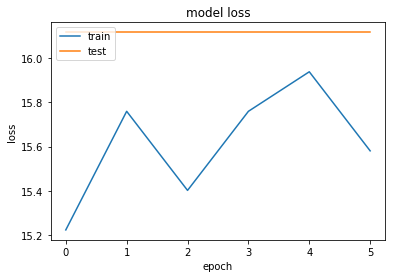

In [35]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

** Model 2 **

In [11]:
input_image = Input(shape=(48,64,30,1,))
input_optical_flow_horz = Input(shape=(48,64,30,1,))
input_optical_flow_vert = Input(shape=(48,64,30,1,))

conv1 = Conv3D(filters = 16, kernel_size = (5,5,5),activation='relu')(input_image)
print(conv1.shape)
maxpool1  = MaxPooling3D(pool_size=(5, 5, 5))(conv1) 
print(maxpool1.shape)


conv2 = Conv3D(filters = 16, kernel_size = (5,5,5),activation='relu')(input_optical_flow_horz)
print(conv2.shape)
maxpool2  = MaxPooling3D(pool_size=(5, 5, 5))(conv2) 
print(maxpool2.shape)


conv3 = Conv3D(filters = 16, kernel_size = (5,5,5),activation='relu')(input_optical_flow_vert)
print(conv3.shape)
maxpool3  = MaxPooling3D(pool_size=(5, 5, 5))(conv3) 
print(maxpool3.shape)


flat_layer1 = Flatten()(maxpool1)
flat_layer2 = Flatten()(maxpool2)
flat_layer3 = Flatten()(maxpool3)

flat_layer = concatenate([flat_layer1,flat_layer2,flat_layer3])
dense_layer1 = Dense(64,activation='relu')(flat_layer)
dense_layer1 = Dropout(0.5)(dense_layer1)
output_layer = Dense(41,activation='softmax')(dense_layer1)

model2 = Model([input_image,input_optical_flow_horz,input_optical_flow_vert], [output_layer])

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model2.compile(loss='categorical_crossentropy',
              optimizer=adam)

(?, 44, 60, 26, 16)
(?, 8, 12, 5, 16)
(?, 44, 60, 26, 16)
(?, 8, 12, 5, 16)
(?, 44, 60, 26, 16)
(?, 8, 12, 5, 16)


In [12]:
history = model2.fit([train_image,train_optical_flow_horz,train_optical_flow_vert], 
          [train_label],
          epochs=6, verbose=2,batch_size = 8,shuffle = True,validation_split=0.1)

/opt/conda/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:2252: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Train on 90 samples, validate on 10 samples
Epoch 1/6
316s - loss: 15.7599 - val_loss: 14.5063
Epoch 2/6
316s - loss: 15.9353 - val_loss: 16.1181
Epoch 3/6
317s - loss: 15.7599 - val_loss: 16.1181
Epoch 4/6
347s - loss: 15.9390 - val_loss: 16.1181
Epoch 5/6
316s - loss: 15.7599 - val_loss: 16.1181
Epoch 6/6
322s - loss: 16.1181 - val_loss: 16.1181


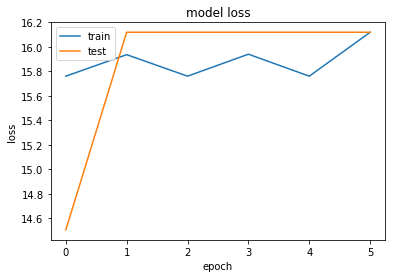

In [13]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
model2.evaluate([test_image,test_optical_flow_horz,test_optical_flow_vert], 
          [test_label])

50/50 [==============================] - 13s    


15.473371467590333